<a href="https://colab.research.google.com/github/peela85/AIML/blob/master/M1_003_Stochastic_Minibatch_GD_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective:

   
  At the end of the experiment, you will be able to :
    
  * Understand various types of gradient descent approaches (Stochastic, Mini-Batch Gradient Descent) and there differences.


In [0]:
#@title Experiment Walkthrough
#@markdown Gradient descent and learning rate variations
from IPython.display import HTML
HTML("""<video width='520' height='240' controls>
<source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/Week_1/stochastic_minibatch_gradient_descent.mp4" type='video/mp4'>
</video>""")

## Dataset

### Description


The dataset consists of two columns and 89 rows. Each column represents a characteristic of a simple pendulum i.e l (length) and t (time period). The dataset describes the relationship between the l and t which is  L∝T2 .


##AI/ML Technique

#### Gradient Descent

Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on a convex function, that tweaks it’s parameters iteratively to minimize a given function to its local minimum.

To know more about Gradient Descent and its variants you can refer the below link:

https://towardsdatascience.com/gradient-descent-in-a-nutshell-eaf8c18212f0

## Keywords



* Stochastic Gradient Descent
* Scipy
* Sklearn
* mini batch Gradient Descent
* Plotting Error vs Iteration

#### Expected Time : 90 mins

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902225" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9059040698" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="M1W1_003_Stochastic_Minibatch_GD_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Exp1/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
# Import the required Packages
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib notebook
from  matplotlib import pyplot as plt
import random
import time


### Read the data

In [5]:
# Load the data by using pandas read_csv()
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
# Print the first 5 rows of dataframe 'data'
print(data.head())
# Print the last 5 rows of dataframe 'data'
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [0]:
# Get the length and time period values from the dataset
l = data['l'].values
t = data['t'].values
# Get the square of time period
tsq = t * t

**Stochastic gradient descent (Single sample)**

Instead of computing the sum of all gradients, stochastic gradient descent selects an observation uniformly at random.

 $y_i = mx_i + c$

$E$ = $(y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $ -(y - (mx_i + c)) * x_i$

$\frac{\partial E }{\partial c}$ = $ -(y - (mx_i + c))$

In [0]:
"""
The function 'next_step' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss is returned.
"""
def next_step(x, y, m, c, eta):
    ycalc = m * x + c
    error = (y - ycalc) ** 2
    delta_m = -(y - ycalc) * x
    delta_c = -(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    return m, c, error

"""
The function below takes a random index and at that index idx, we calculate the values of m,c and error.
We use one data point at a time x[idx],y[idx]
Here we call the funtion 'next_step' to which we pass a data point x[idx],y[idx]
"""
def one_loop_random(x, y, m, c, eta):
    # Making random idx
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    # Training with random idx
    for idx in random_idx:
        m, c, e = next_step(x[idx], y[idx], m, c, eta)
        #print(m, c, e)
    return m,c,e
  
"""
The function below trains the data for 1000 iterations. 
In each iteration it calls the 'one_loop_random' function.
"""
def train_stochastic(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = one_loop_random(x, y, m, c, eta)
    return m, c, err

## TRAIN

In [0]:
# Init m, c
m, c = 0, 0

In [0]:
# Learning rate
lr = 0.001

m = 2.20165 c = 1.18821 Error = 0.372843
m = 2.92046 c = 0.775233 Error = 0.0311833
m = 3.3728 c = 0.515101 Error = 0.140657
m = 3.65773 c = 0.351712 Error = 6.00942e-05
m = 3.83684 c = 0.248418 Error = 0.0322118
m = 3.94979 c = 0.183762 Error = 0.0198563
m = 4.02086 c = 0.142992 Error = 0.000231196
m = 4.06548 c = 0.11716 Error = 0.00170107
m = 4.09373 c = 0.101171 Error = 0.00758359
m = 4.11134 c = 0.0908306 Error = 2.0583e-05


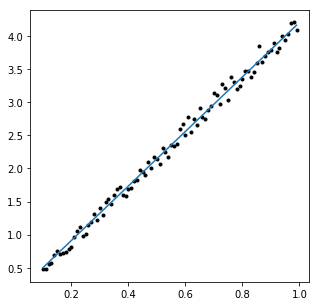

In [10]:
# Training for 1000 iterations, plotting after every 100 iterations:
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 1: Experiment with other lr values.**



m = 3.65924 c = 0.351309 Error = 0.020284
m = 4.06584 c = 0.116715 Error = 0.000715669
m = 4.12971 c = 0.0804086 Error = 0.0152891
m = 4.13909 c = 0.0738204 Error = 0.0125462
m = 4.14148 c = 0.074284 Error = 0.0246393
m = 4.14192 c = 0.0745706 Error = 0.012308
m = 4.14159 c = 0.073728 Error = 1.14707e-05
m = 4.1413 c = 0.0731757 Error = 0.00172675
m = 4.14139 c = 0.0735255 Error = 0.0040961
m = 4.14133 c = 0.0734169 Error = 0.00577269


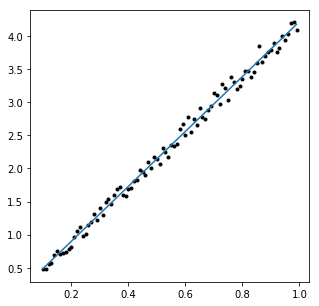

In [11]:
##Your Code Here
m, c = 0, 0
lr = 0.004

%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_stochastic() method to update m and c and get error value with lr = 0.004.
for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)
    
    

m = 2.92146 c = 0.774929 Error = 0.111115
m = 3.65836 c = 0.351335 Error = 0.0137594
m = 3.95011 c = 0.183507 Error = 0.00484568
m = 4.06573 c = 0.117189 Error = 0.00661903
m = 4.11137 c = 0.0907073 Error = 0.0126201
m = 4.12954 c = 0.0803072 Error = 0.00934826
m = 4.13677 c = 0.0762992 Error = 0.00147494
m = 4.13958 c = 0.0746408 Error = 0.0101696
m = 4.14078 c = 0.0740995 Error = 0.0083855
m = 4.14121 c = 0.0737919 Error = 5.80801e-05


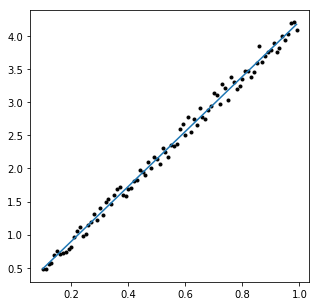

In [12]:
##Your Code Here
m, c = 0, 0
lr = 0.002

%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_stochastic() method to update m and c and get error value with lr = 0.002.
for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

m = 3.37531 c = 0.515021 Error = 0.00787888
m = 3.95061 c = 0.183418 Error = 0.0682423
m = 4.09367 c = 0.100441 Error = 0.00706401
m = 4.12912 c = 0.0795864 Error = 0.0119345
m = 4.13859 c = 0.0754892 Error = 0.00738439
m = 4.14047 c = 0.0735763 Error = 1.75335e-05
m = 4.14142 c = 0.0738376 Error = 0.00924
m = 4.14147 c = 0.0735062 Error = 0.00951609
m = 4.1413 c = 0.0733769 Error = 0.0019102
m = 4.14148 c = 0.0736494 Error = 0.00629633


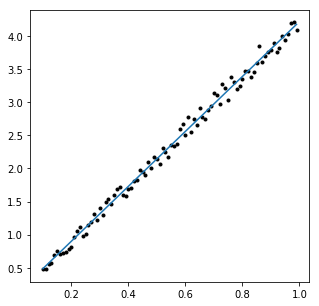

In [13]:
##Your Code Here
m, c = 0, 0
lr = 0.003

%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_stochastic() method to update m and c and get error value with lr = 0.003.
for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 2: plot Errors vs Iterations**

In [0]:
# Your Code Here
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001

# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for times in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)


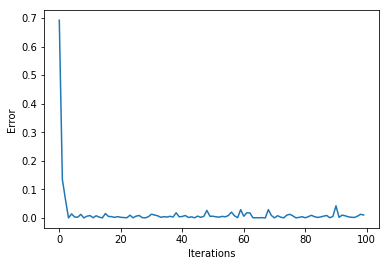

In [15]:
### Your Code Here
plt.plot(range(len(errs)), errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

**Ungraded Exercise 3 : Is this better than sequential gradient descent and vanilla gradient descent?**

Hint - check the error value at saturation, and time it takes to reach saturation.

In [0]:
# Your Code Here

def train(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    #Calculate "delta_m" and "delta_c"
    #<YOUR CODE HERE>
    delta_m = -(y - ycalc) * x
    delta_c = -(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error
  
errs_1 = []
m, c = 0, 0
eta =0.004
for iteration in range (100):
  m_1, c_1, error = train(1, tsq, m, c, eta)
  errs_1.append(error)



ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.004

# Call the train_stochastic() method to update m and c and get error value with lr = 0.004.
for times in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)

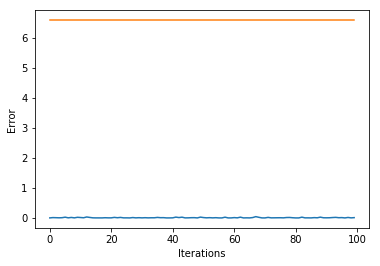

In [17]:

plt.plot(range(len(errs)), errs)
plt.plot(range(len(errs_1)), errs_1)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

## PROBLEM

Problem with Sequential/Stochastic Gradient Descent is it does not scale well - it makes the same calculation of gradient descent on each sample. So the time taken will increase linearly with the number of samples. Many datasets have samples in the range of millions. Hence, even though it gives good results, it is not ideal.

We need a gradient descent formulation that gives the speed of vanilla gradient descent and the accuracy of sequential/stochastic gradient descent.

Next we will see **Minibatch Gradient Descent!**

### Minibatch Gradient Descent

In Mini-Batch Gradient Descent algorithm, rather than using  the complete data set, in every iteration we use a subset of training examples (called "batch") to compute the gradient of the cost function. 

Common mini-batch sizes range between 50 and 256, but can vary for different applications.

one_batch() : we will be calculating the essenial parts of the Gradient Descent method:  

$y_i = mx_i + c$
        
$E$ =$\frac{1}{n}$   $\sum_{i=1}^n (y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -x_i(y - (mx_i + c))$
 
$\frac{\partial E}{\partial c}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -(y - (mx_i + c))$

one_step() : We will be splitting our data into batches.

In [0]:
"""
The function 'train_one_batch' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss is returned.
"""
def train_one_batch(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

"""
The function below takes a batch_size and loss is calculated w.r.t batches.
The batches are created using random index.
The m, c and error values are calculated for each batch of data.
So, it calls the function 'train_one_batch' by passing batch_x, batch_y for each batch.
"""
def train_batches(x, y, m, c, eta, batch_size):
    # Making the batches
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    
    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[batch*batch_size:(batch+1)*batch_size]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)
    
    return m, c, err

"""
The function below trains the data for 1000 iterations. 
The data is traversed in batches, the batch size here is considered to be 10.
In each iteration it calls the 'train_batches' function. 
The 'batch_size' is passed as a parameter to 'train_batches'.
"""
def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_batches(x, y, m, c, eta, batch_size)
    return m, c, err


#### TRAIN

In [0]:
# Init m, c
m, c = 0, 0

In [0]:
# Learning rate
lr = 0.001

In [0]:
# Batch size
batch_size = 10

m = 0.276529 c = 0.408341 Error = 4.1726
m = 0.49608 c = 0.718257 Error = 2.71618
m = 0.671759 c = 0.952549 Error = 1.8504
m = 0.813639 c = 1.12874 Error = 1.33379
m = 0.929467 c = 1.26031 Error = 1.02365
m = 1.0252 c = 1.35762 Error = 0.835624
m = 1.10541 c = 1.42863 Error = 0.719865
m = 1.17362 c = 1.47945 Error = 0.646911
m = 1.23254 c = 1.51479 Error = 0.599347
m = 1.28426 c = 1.53828 Error = 0.566879


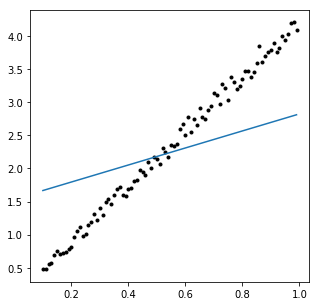

In [22]:
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 4: Experiment with other lr values.**

m = 0.672771 c = 0.954287 Error = 1.85855
m = 1.02612 c = 1.35919 Error = 0.836419
m = 1.23319 c = 1.51586 Error = 0.599457
m = 1.3725 c = 1.56079 Error = 0.525506
m = 1.47972 c = 1.55585 Error = 0.486574
m = 1.57104 c = 1.52907 Error = 0.456261
m = 1.65387 c = 1.49313 Error = 0.429055
m = 1.73158 c = 1.45376 Error = 0.403741
m = 1.80575 c = 1.41354 Error = 0.379997
m = 1.87713 c = 1.37362 Error = 0.357684


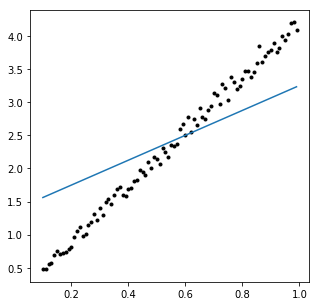

In [23]:
m, c = 0, 0
lr = 0.003
batch_size = 10
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

m = 0.931474 c = 1.26374 Error = 1.02725
m = 1.28537 c = 1.54009 Error = 0.567084
m = 1.47997 c = 1.55619 Error = 0.486733
m = 1.62707 c = 1.50578 Error = 0.438041
m = 1.75673 c = 1.44038 Error = 0.3958
m = 1.87721 c = 1.37359 Error = 0.357806
m = 1.99094 c = 1.3089 Error = 0.323534
m = 2.09878 c = 1.24711 Error = 0.292611
m = 2.20116 c = 1.18834 Error = 0.26471
m = 2.2984 c = 1.13248 Error = 0.239535


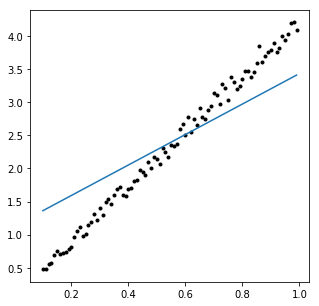

In [24]:
m, c = 0, 0
lr = 0.005
batch_size = 10
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

m = 2.01326 c = 1.29612 Error = 0.290294
m = 2.67208 c = 0.917982 Error = 0.162588
m = 3.12668 c = 0.656373 Error = 0.0752691
m = 3.44082 c = 0.47617 Error = 0.0265553
m = 3.65762 c = 0.351495 Error = 0.0178262
m = 3.80733 c = 0.265434 Error = 0.0127441
m = 3.91079 c = 0.20614 Error = 0.0118982
m = 3.98218 c = 0.165117 Error = 0.0114044
m = 4.03149 c = 0.136793 Error = 0.00598186
m = 4.06556 c = 0.11727 Error = 0.00959303


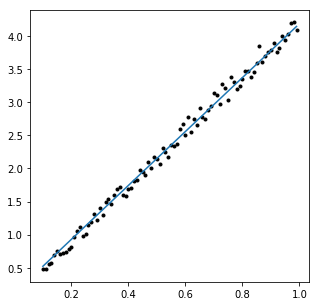

In [25]:
m, c = 0, 0
lr = 0.004
batch_size = 10
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()


for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=10, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

m = 4.13981 c = 0.0702291 Error = 0.0056853
m = 4.14127 c = 0.0737884 Error = 0.0112459
m = 4.13819 c = 0.0682753 Error = 0.00666552
m = 4.14163 c = 0.0757858 Error = 0.00683317
m = 4.1412 c = 0.0723937 Error = 0.00961606
m = 4.14543 c = 0.0810307 Error = 0.0121053
m = 4.13906 c = 0.06888 Error = 0.00680092
m = 4.14272 c = 0.0734281 Error = 0.00726414
m = 4.14374 c = 0.0776235 Error = 0.00285712
m = 4.14183 c = 0.0736955 Error = 0.0103996


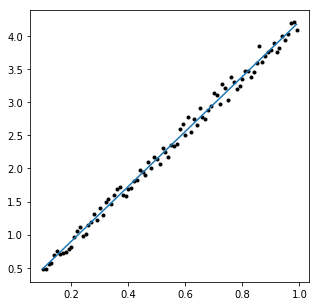

In [26]:
m, c = 0, 0
lr = 0.1
batch_size = 10
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=10, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 5: Experiment with other batch_size values.**

m = 3.03686 c = 0.710981 Error = 0.0926206
m = 3.74331 c = 0.298615 Error = 0.0174659
m = 4.00131 c = 0.157252 Error = 0.00867409
m = 4.09147 c = 0.103326 Error = 0.00716314
m = 4.12539 c = 0.0831496 Error = 0.00758036
m = 4.13622 c = 0.0761005 Error = 0.00661308
m = 4.14149 c = 0.0754946 Error = 0.00800083
m = 4.14129 c = 0.0728377 Error = 0.0074035
m = 4.14021 c = 0.075364 Error = 0.00711847
m = 4.14154 c = 0.0739042 Error = 0.00658391


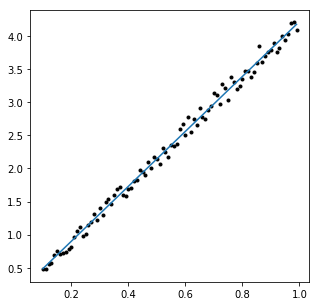

In [27]:
m, c = 0, 0
lr = 0.1
batch_size = 70
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

m = 3.04108 c = 0.714054 Error = 0.0826783
m = 3.7504 c = 0.298203 Error = 0.0169046
m = 4.00227 c = 0.158467 Error = 0.00825894
m = 4.0925 c = 0.10162 Error = 0.0057952
m = 4.12272 c = 0.0817922 Error = 0.00660245
m = 4.13702 c = 0.0830717 Error = 0.0076092
m = 4.13765 c = 0.0725875 Error = 0.00731907
m = 4.14514 c = 0.0724505 Error = 0.00611291
m = 4.14425 c = 0.077409 Error = 0.00650858
m = 4.14265 c = 0.0763769 Error = 0.00749003


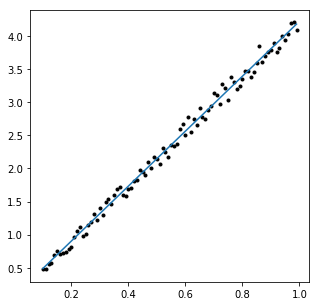

In [28]:
m, c = 0, 0
lr = 0.1
batch_size = 50
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()


for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)


#### Plotting error vs iterations

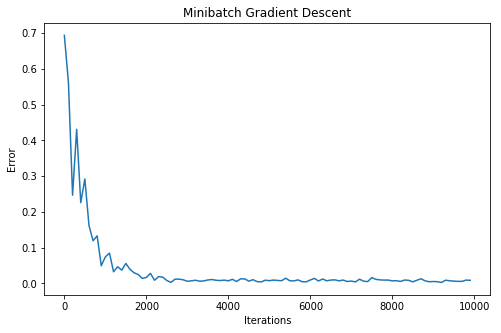

In [29]:
%matplotlib inline

ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
batch_size = 10

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size = 10.
for times in range(100):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    
    errs.append(error)
    
# plot Errors vs Iterations
epoch = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Minibatch Gradient Descent")
plt.show()

**Ungraded Exercise 6: Is this better than sequential gradient descent and vanilla gradient descent?**

Hint - check the error value at saturation, and time it takes to reach saturation.

In [0]:
#### Last Error at saturation: 0.006

In [0]:
errs_1 = []
m, c = 0, 0
eta =0.006
for iteration in range (100):
  m_1, c_1, error = train(1, tsq, m, c, eta)
  errs_1.append(error)



ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.004

# Call the train_stochastic() method to update m and c and get error value with lr = 0.004.
for times in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
    
    
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.006
batch_size = 10

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size = 10.
for times in range(100):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    
    errs.append(error)

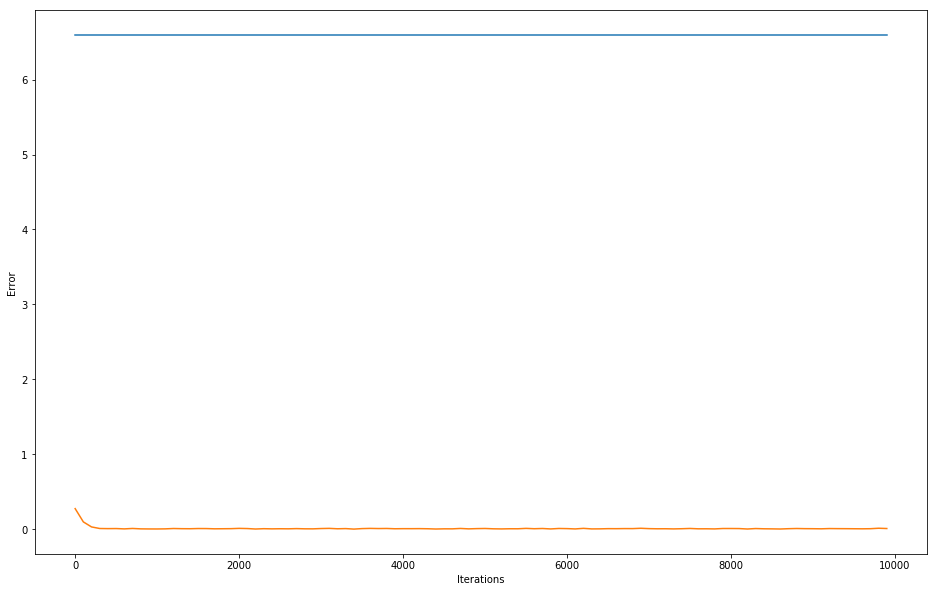

In [32]:

    
# plot Errors vs Iterations
epoch = range(0, 10000, 100)
plt.figure(figsize=(16,10))
plt.plot(epoch, errs_1)
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

### Please answer the questions below to complete the experiment:

In [0]:
#@title For very large datasets, which of the following gradient descent methods is recommended? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Stochastic" #@param ["Stochastic","Mini-batch","Batch"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["Yes", "No"]

In [40]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 9257
Date of submission:  04 May 2019
Time of submission:  12:33:35
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
